In [101]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

## Ajout du chemin source
import os
import sys
NumAppPath = os.path.abspath('../../NumApp')
sys.path.append(NumAppPath)

dataPath = os.path.join(NumAppPath,"data19")


## Paramètres 
plt.rcParams["figure.figsize"] = (15,10)


# Etude test sur 300 pièces du type 19

## Matrice de Distance
Le premier algorithme qui compare les points d'intérêts extrait par processus gaussiens permet d'obtenir une matrice des "Distance" entre chaque pièce

In [106]:
from ImageProcessing.processing import cropToCoin

def transformDist(D:np.ndarray)->np.ndarray:
    D = np.nan_to_num(D)
    D = D + D.T
    np.fill_diagonal(D,np.min(D))
    D = D + np.abs(np.min(D))
    return D
    

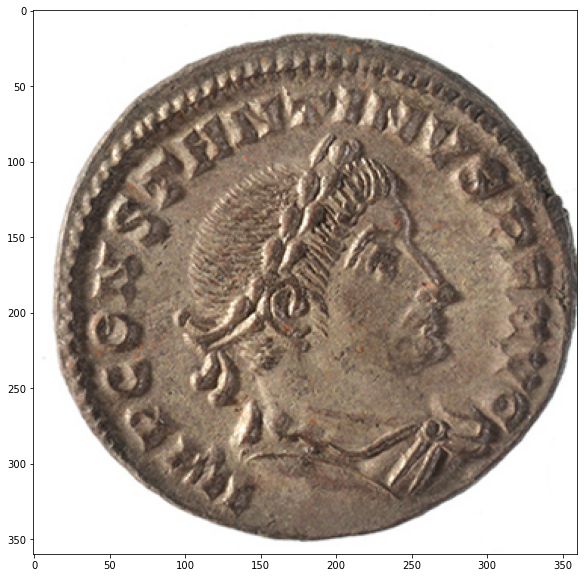

In [113]:
dataList = sorted(os.listdir(dataPath),reverse=True)
img = cropToCoin(os.path.join(dataPath,dataList[197]))
plt.imshow(img)


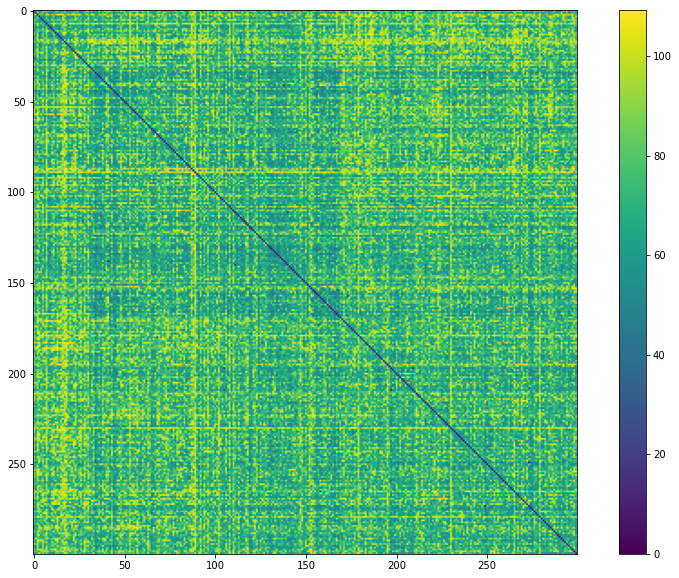

In [114]:
DRaw = np.load("DistMatrix19.npy")
D = transformDist(DRaw)
plt.imshow(D)
plt.colorbar()
plt.show()

Une valeur de distance faible correspond à des monnaies qui se ressemblent

## Représentation des valeurs 
Algorithme T-SNE (t-distributed stochastic neighbor embedding)


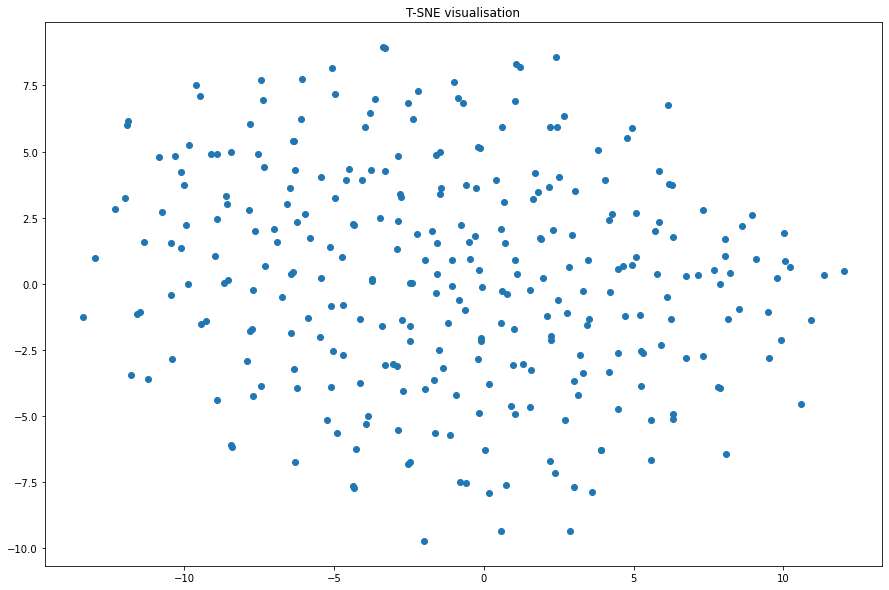

In [115]:
from sklearn.manifold import TSNE

X = TSNE(n_components=2, learning_rate='auto',metric='precomputed', init='random',square_distances=True).fit_transform(D)

plt.scatter(X[:,0],X[:,1])
plt.title("T-SNE visualisation")
plt.show()

In [116]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=2,metric='precomputed')
C = db.fit_predict(D)

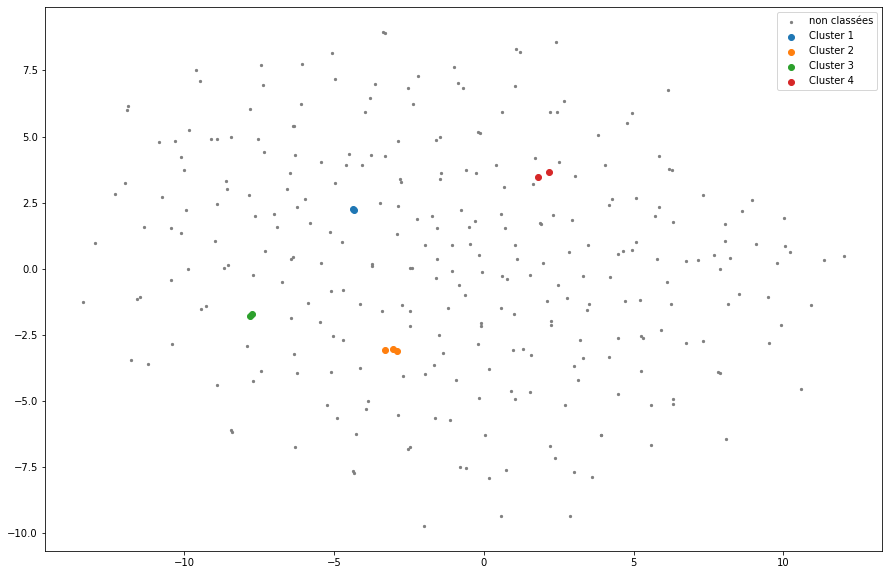

In [117]:
#nb cluster 
nbCluster = len(set(C)) - (1 if -1 in C else 0)

Clusters = []
#plot points non classées
Cl0 = X[np.argwhere(C==-1).ravel()]
plt.scatter(Cl0[:,0],Cl0[:,1],c='gray',label="non classées",s=5)

for i in range(nbCluster):
    Cli = np.argwhere(C==i).ravel()
    CliCoord = X[Cli]
    Clusters.append(Cli)
    plt.scatter(CliCoord[:,0],CliCoord[:,1],label = "Cluster %d"%(i+1))

plt.legend()
plt.show()


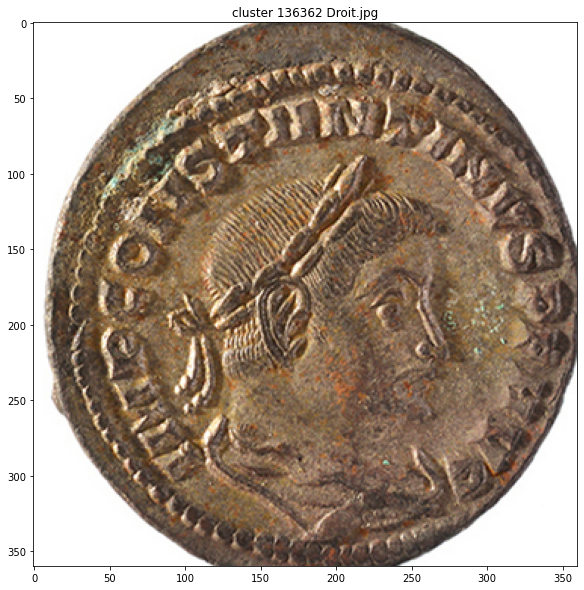

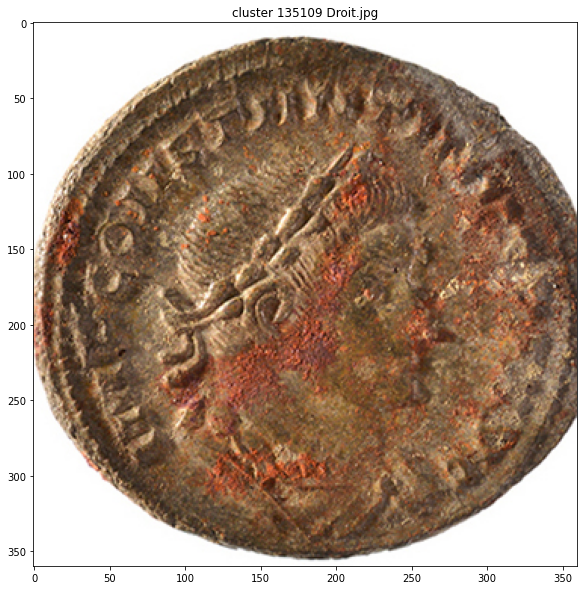

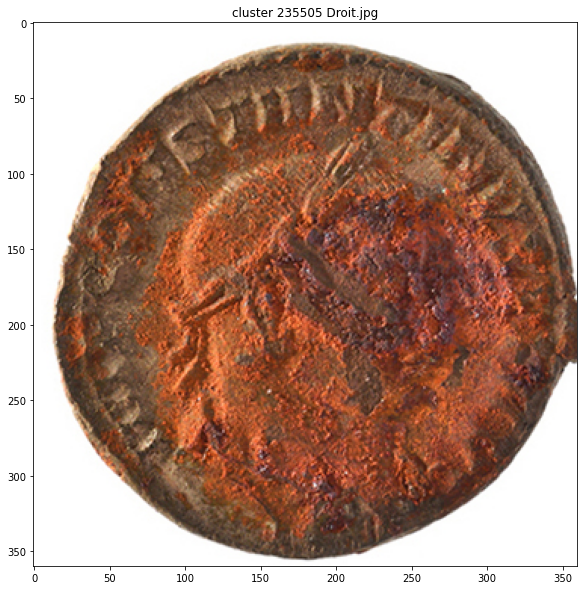

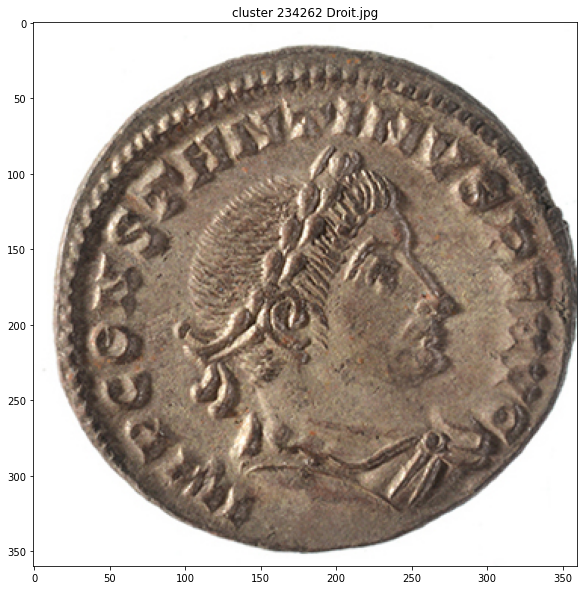

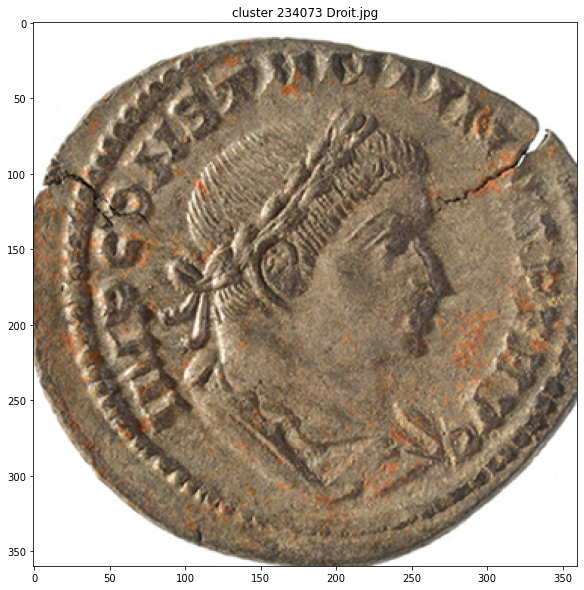

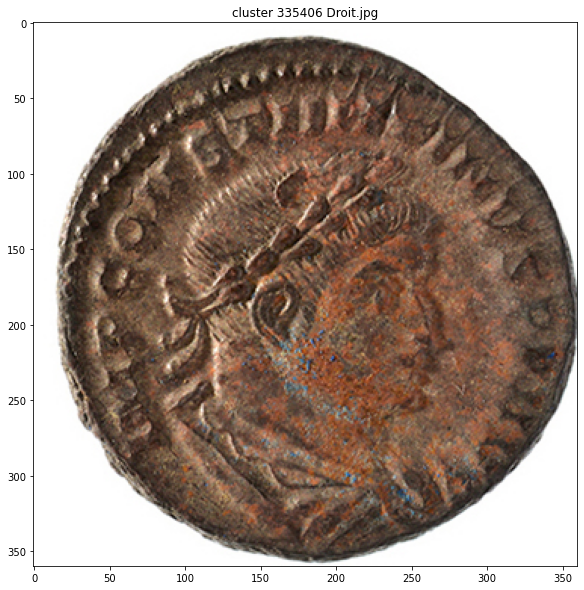

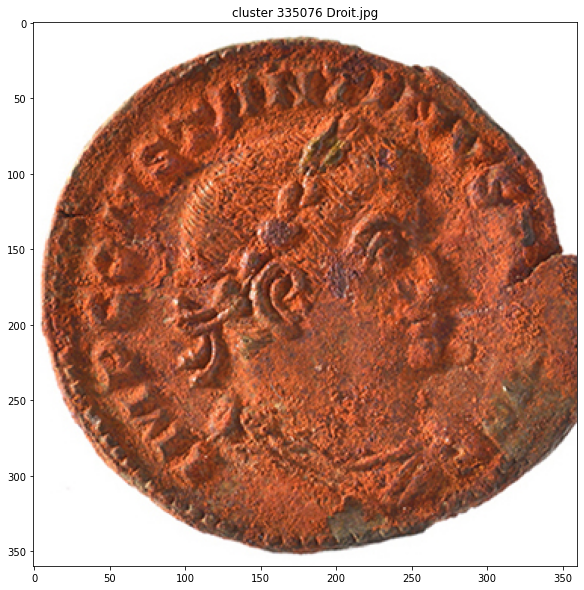

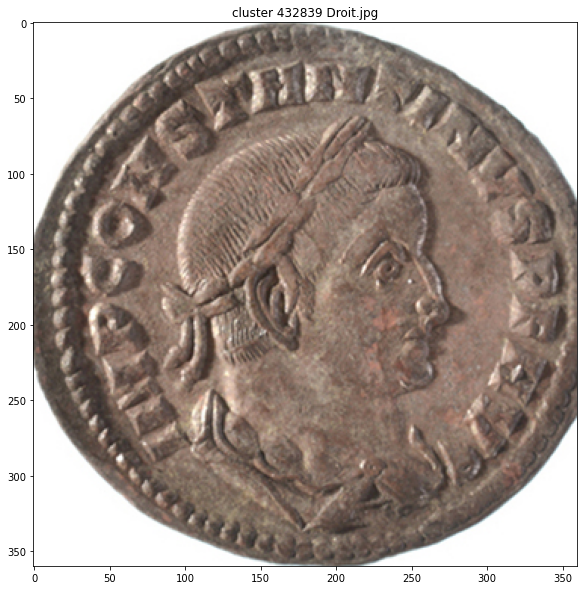

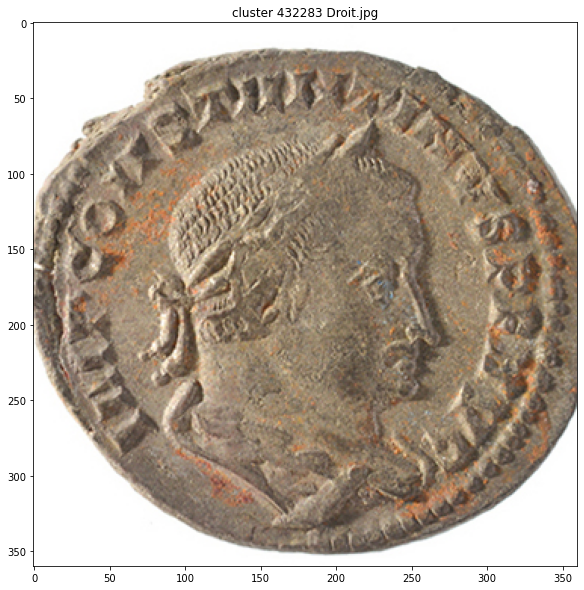

In [118]:
for i in range(len(Clusters)):
    clst = Clusters[i]
    for j in clst:
        plt.figure()
        plt.title("cluster %d"%(i+1)+dataList[j])
        img = cropToCoin(os.path.join(dataPath,dataList[j]))
        plt.imshow(img)
    

In [215]:
np.count_nonzero(db.labels_!=-1)

9

In [216]:
labels = db.labels_

nbcluster = len(set(labels))- (1 if -1in labels else 0)
print(nbcluster)

4


In [234]:
np.sum(labels==4)

0

In [205]:
len(db.core_sample_indices_)

9

In [206]:
nbValues = 200
distList = np.linspace(1,100,nbValues)
nbClusterList = np.zeros(nbValues)
nbInCluster = np.zeros(nbValues)

nbCluster

for i in range(nbValues):
    dist = distList[i]
    db = DBSCAN(eps=dist, min_samples=2,metric='precomputed')
    X = db.fit_predict(NewDist)
    labels = db.labels_
    nbcluster = len(set(labels))- (1 if -1in labels else 0)
    nbClusterList[i] = nbcluster
    nbInCluster[i]= len(db.core_sample_indices_)

    
    

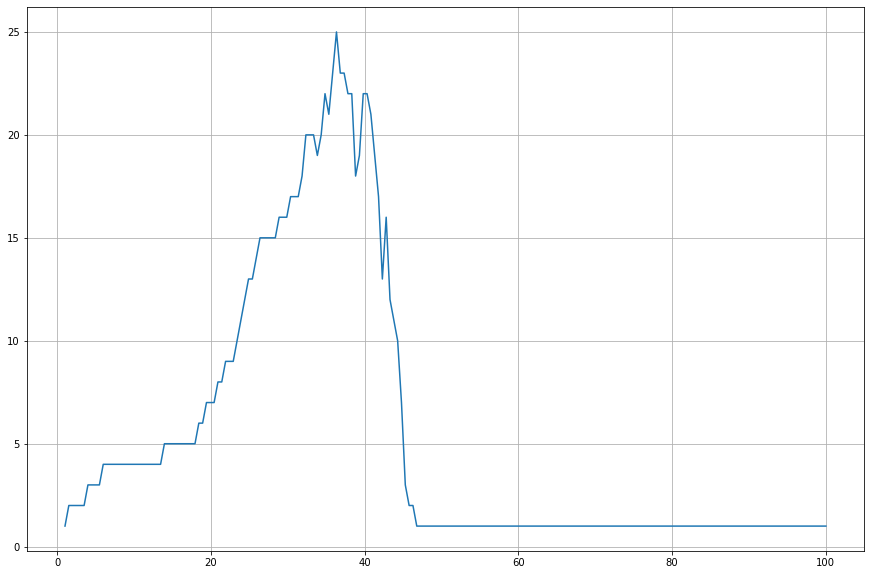

In [207]:
plt.plot(distList,nbClusterList)
plt.grid()


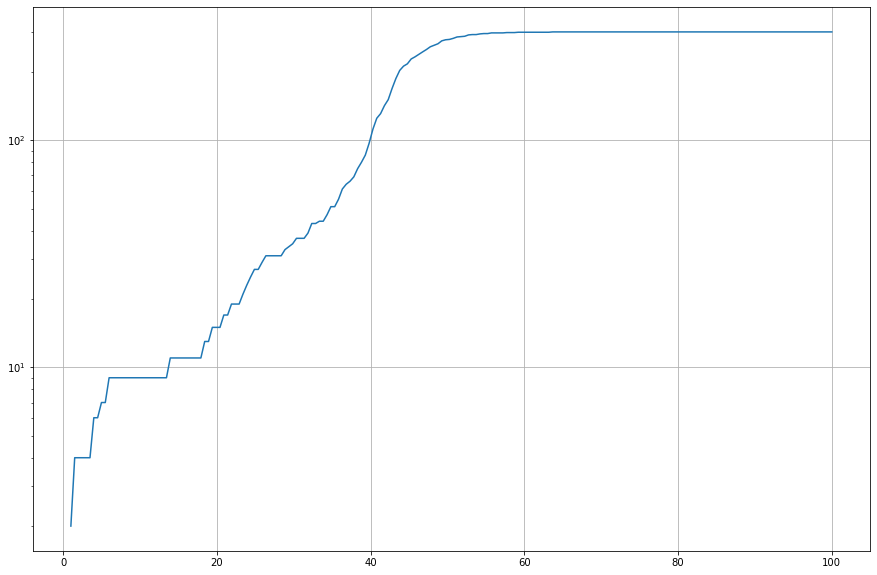

In [211]:
plt.plot(distList,nbInCluster)
plt.yscale("log")
plt.grid()

In [181]:
NewDist[209,197]

0.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


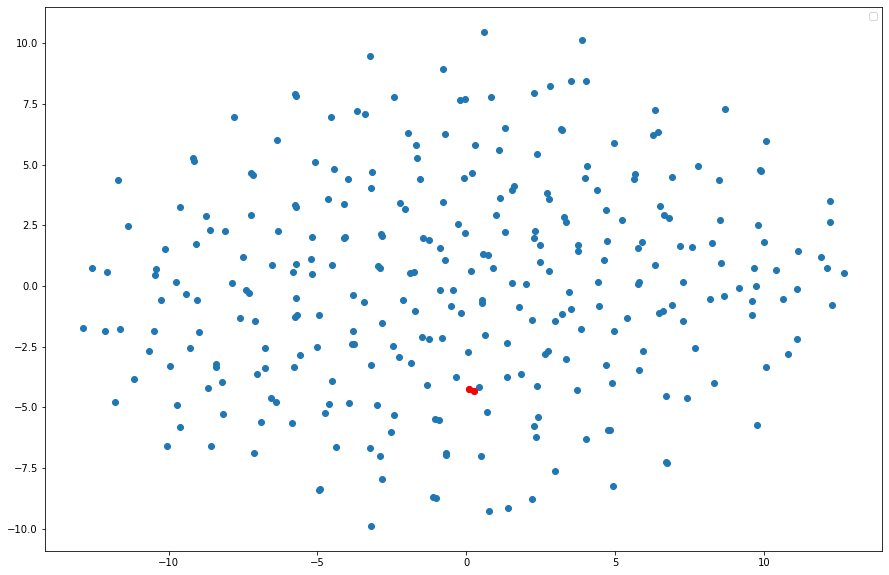